<a href="https://colab.research.google.com/github/hargurjeet/Maersk/blob/main/Solution_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Maersk Assignment

In [1]:
!pip install -q gitpython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.1 MB/s eta 0:00:00


In [65]:
## Python Imports
import pandas as pd
import numpy as np
from git import Repo
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Clone the GitHub repository
repo_url = 'https://github.com/hargurjeet/Maersk'
repo_dir = 'Maersk'
Repo.clone_from(repo_url, repo_dir)

<git.repo.base.Repo '/content/Maersk/.git'>

In [49]:
## Acessing the vessel data
file_path  = "/content/Maersk/Vessel_journey_data.csv"
date_cols = ['arrival_date', 'departure_date',
             'arrival_time', 'departure_time', 'prev_arrival_time', 'prev_departure_time', 'next_arrival_time']
dtypes = {
    'imo' : 'object',
}

vessel_data = pd.read_csv(file_path, parse_dates=date_cols,dtype = dtypes)

pd.set_option('display.max_columns', None)
vessel_data.head(2)

,call_id,arrival_date,departure_date,arrival_time,departure_time,imo,vessel_name_ais,vessel_type_ais,Country,CountryCode,Port,Terminal,Duration,Service_name,length,prev_departure_time,vesteu,prev_port,prev_arrival_time,prev_duration,prev_leg_duration,prev_leg_distance_nm,prev_leg_stationary_hours,prev_call_id,next_port,next_arrival_time,next_duration,next_leg_duration,next_leg_distance_nm,next_leg_stationary_hours,next_call_id
0,7b75a18f54d78c79df4e9ceb29c65c60d6b5c7ae,2022-01-05,2022-01-07,2022-01-05 23:00:19+00:00,2022-01-07 21:04:26+00:00,9525376,SAFMARINE CHAMBAL,Container Ship,China,CN,Xiamen,Xiamen Songyu Container Terminal,46.068611,ML - TPX,249.12,2021-12-14 07:00:05+00:00,4496,Haiphong,2021-12-13 17:02:55+00:00,13.952778,544.003889,1598.620103,28,705238686bb73f1947352631d015ad9485d78a9c,Los Angeles,2022-02-10 12:01:14+00:00,207.020556,806.946667,7407.903024,201.0,c77797c9b9822d7a799e6f7664f7d6be5f73f270
1,c77797c9b9822d7a799e6f7664f7d6be5f73f270,2022-02-10,2022-02-19,2022-02-10 12:01:14+00:00,2022-02-19 03:02:28+00:00,9525376,SAFMARINE CHAMBAL,Container Ship,United States,US,Los Angeles,Apmt Pier 400,207.020556,ML - TPX,249.12,2022-01-07 21:04:26+00:00,4496,Xiamen,2022-01-05 23:00:19+00:00,46.068611,806.946667,7407.903024,201,7b75a18f54d78c79df4e9ceb29c65c60d6b5c7ae,Qingdao,2022-03-08 22:27:41+00:00,105.949167,427.420278,5967.080241,25.0,0dccb61f51069f40de6592464459777a2eb73334


In [23]:
vessel_data.Port.head(6)

0             Xiamen
1        Los Angeles
2            Qingdao
3       Laem Chabang
4          Singapore
5    Tanjung Pelepas
Name: Port, dtype: object

In [12]:
vessel_data.columns

Index(['arrival_time_departure_time_prev_arrival_time_prev_departure_time_next_arrival_time',
       'call_id', 'arrival_date', 'departure_date', 'imo', 'vessel_name_ais',
       'vessel_type_ais', 'Country', 'CountryCode', 'Port', 'Terminal',
       'Duration', 'Service_name', 'length', 'vesteu', 'prev_port',
       'prev_duration', 'prev_leg_duration', 'prev_leg_distance_nm',
       'prev_leg_stationary_hours', 'prev_call_id', 'next_port',
       'next_duration', 'next_leg_duration', 'next_leg_distance_nm',
       'next_leg_stationary_hours', 'next_call_id'],
      dtype='object')

In [19]:
## acesssing geo data
geo_data = pd.read_csv("/content/Maersk/Geographical Data.csv")
geo_data.head()

,CountryCode,Country,PORT_UNLOCODE,PORT,LATITUDE,LONGITUDE
0,CZ,Czech Republic,CZKR2,Kropacova Vrutice,50.33060,14.71620
1,GB,United Kingdom,GB2WW,Farlington Hants,50.85000,-1.02000
2,RO,Romania,ROHN5,Sangeru,45.13238,26.34561
3,ES,Spain,ESFTC,Fontcoberta Girona,42.13000,2.80000
4,KG,Kyrgyzstan,KG6IA,Dzhalal-Abad,40.93400,73.00700


In [36]:
print(vessel_data.shape, geo_data.shape)

(1131992, 31) (142765, 6)


In [18]:
vessel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1131992 entries, 0 to 1131991
Data columns (total 31 columns):
 #   Column                     Non-Null Count    Dtype              
---  ------                     --------------    -----              
 0   call_id                    1131992 non-null  object             
 1   arrival_date               1131992 non-null  datetime64[ns]     
 2   departure_date             1131992 non-null  datetime64[ns]     
 3   arrival_time               1131992 non-null  datetime64[ns, UTC]
 4   departure_time             1131992 non-null  datetime64[ns, UTC]
 5   imo                        1131992 non-null  int64              
 6   vessel_name_ais            1131992 non-null  object             
 7   vessel_type_ais            1131366 non-null  object             
 8   Country                    1131992 non-null  object             
 9   CountryCode                1130921 non-null  object             
 10  Port                       1131992 non-nul

In [21]:
geo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142765 entries, 0 to 142764
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   CountryCode    142643 non-null  object 
 1   Country        142765 non-null  object 
 2   PORT_UNLOCODE  142765 non-null  object 
 3   PORT           142764 non-null  object 
 4   LATITUDE       142765 non-null  float64
 5   LONGITUDE      142765 non-null  float64
dtypes: float64(2), object(4)
memory usage: 6.5+ MB


In [39]:
geo_lat_long = geo_data[['PORT', 'LATITUDE', 'LONGITUDE']].drop_duplicates()

In [43]:
geo_lat_long.PORT.value_counts()

PORT
Franklin               28
Richmond               28
Clinton                27
Georgetown             26
Springfield            26
                       ..
Viiratsi                1
Cereweh                 1
Saint-Remy-Chaussee     1
Horni Berkovice         1
Laigneville             1
Name: count, Length: 127759, dtype: int64

In [41]:
## Combining both the datasets
# vessel_geo_data = pd.merge(vessel_data, geo_lat_long, left_on='Port', right_on='PORT', how='left')
# vessel_geo_data.shape

(2473840, 34)

In [50]:
vessel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1131992 entries, 0 to 1131991
Data columns (total 31 columns):
 #   Column                     Non-Null Count    Dtype              
---  ------                     --------------    -----              
 0   call_id                    1131992 non-null  object             
 1   arrival_date               1131992 non-null  datetime64[ns]     
 2   departure_date             1131992 non-null  datetime64[ns]     
 3   arrival_time               1131992 non-null  datetime64[ns, UTC]
 4   departure_time             1131992 non-null  datetime64[ns, UTC]
 5   imo                        1131992 non-null  object             
 6   vessel_name_ais            1131992 non-null  object             
 7   vessel_type_ais            1131366 non-null  object             
 8   Country                    1131992 non-null  object             
 9   CountryCode                1130921 non-null  object             
 10  Port                       1131992 non-nul

Observations -
- Dataset contains few columns with null values
- The parsed columns looks fine

In [51]:
vessel_data.describe()

,arrival_date,departure_date,Duration,length,vesteu,prev_duration,prev_leg_duration,prev_leg_distance_nm,prev_leg_stationary_hours,next_duration,next_leg_duration,next_leg_distance_nm,next_leg_stationary_hours
count,1131992,1131992,1.131992e+06,1.129635e+06,1.131992e+06,1.126872e+06,1.128073e+06,1.127880e+06,1.131992e+06,1.116443e+06,1.116443e+06,1.116236e+06,1.116443e+06
mean,2023-01-07 13:52:38.558011392,2023-01-08 14:44:53.404194048,2.508703e+01,1.878838e+02,2.600317e+03,2.510840e+01,4.330027e+02,2.574489e+03,1.126236e+02,2.458175e+01,3.306330e+02,2.059324e+03,9.107310e+01
min,2022-01-01 00:00:00,2022-01-01 00:00:00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,-1.267578e+02,0.000000e+00,0.000000e+00,1.000000e+00,-2.030106e+02,0.000000e+00,0.000000e+00
25%,2022-07-10 00:00:00,2022-07-11 00:00:00,8.965278e+00,1.344400e+02,0.000000e+00,8.966667e+00,2.797861e+01,1.422531e+02,1.000000e+00,8.961389e+00,2.720111e+01,1.393792e+02,1.000000e+00
50%,2023-01-15 00:00:00,2023-01-16 00:00:00,1.595083e+01,1.750000e+02,1.100000e+03,1.595083e+01,7.499083e+01,5.719228e+02,1.000000e+01,1.580583e+01,7.329500e+01,5.592997e+02,1.000000e+01
75%,2023-07-09 00:00:00,2023-07-10 00:00:00,2.703194e+01,2.290000e+02,2.940000e+03,2.702694e+01,1.939728e+02,1.517792e+03,4.500000e+01,2.700000e+01,1.850211e+02,1.473006e+03,4.300000e+01
max,2023-12-31 00:00:00,2024-03-20 00:00:00,7.741002e+03,9.010000e+02,2.434600e+04,1.380394e+04,5.932889e+04,3.678599e+05,2.394700e+04,7.741002e+03,1.899240e+04,1.537870e+05,1.380500e+04
std,NaN,NaN,4.446823e+01,8.065368e+01,3.919453e+03,4.737493e+01,1.564345e+03,8.560906e+03,4.631940e+02,4.223777e+01,9.834795e+02,5.477103e+03,3.273199e+02


Key Insights -
- Duration of the vessel on the port varies from 1 to 27 days upto 75 percentile of data. The higher number seems to be incorrect for the moment. This should be verified.
- The minimum values of vessel is 0 for some records which seems incorrect.
- vesteu which is the capacity of the vessel, I observe minimum value is 0 and 25 percentile of records contain values as 0 which seems incorrect as a vessel can not have 0 capacity.
- Previous duration and previous leg duration have a very high max values. It would be worth to get it verfied.
- Pervious leg duration also have negative values which I believe doesnot make sense, same applies for next leg duration
- Next leg distance have zero values which seems incorrect.
- By seeing the arrival date the data is from jan 2022 to till dec 2023 i.e. 2 years

In [59]:
## Dataset records before cleaning
print('Record Count Before Cleaning', vessel_data.shape)

def data_cleanup(df):

  return df[(df.length > 0) & (df.vesteu > 0) & (df.prev_leg_duration > 0) & (df.prev_leg_distance_nm > 0) &
      (df.prev_leg_stationary_hours > 0) &(df.next_leg_duration > 0)& (df.next_leg_distance_nm > 0) &(df.next_leg_stationary_hours > 0)]

vessel_data_cleaned_v1 = data_cleanup(vessel_data)

print('Record Count After Cleaning', vessel_data_cleaned_v1.shape)

Record Count Before Cleaning (1131992, 31)
Record Count After Cleaning (494468, 31)


In [60]:
print('Record Count Before Cleaning', vessel_data.shape)

def data_cleanup(df):

  return df[(df.length > 0) & (df.vesteu > 0) & (df.prev_leg_duration > 0) & (df.prev_leg_distance_nm > 0) &
            (df.next_leg_duration > 0)& (df.next_leg_distance_nm > 0)]

vessel_data_cleaned_v2 = data_cleanup(vessel_data)

print('Record Count After Cleaning', vessel_data_cleaned_v2.shape)

Record Count Before Cleaning (1131992, 31)
Record Count After Cleaning (762300, 31)


In [61]:
data_loss_v1 = ((vessel_data.shape[0] - vessel_data_cleaned_v1.shape[0])/vessel_data.shape[0])*100
data_loss_v2 = ((vessel_data.shape[0] - vessel_data_cleaned_v2.shape[0])/vessel_data.shape[0])*100
print(data_loss_v1, data_loss_v2)

56.31877257083089 32.65853468929109


In [64]:
vessel_data_cleaned_v1.describe()

,arrival_date,departure_date,Duration,length,vesteu,prev_duration,prev_leg_duration,prev_leg_distance_nm,prev_leg_stationary_hours,next_duration,next_leg_duration,next_leg_distance_nm,next_leg_stationary_hours
count,494468,494468,494468.000000,494468.000000,494468.000000,494462.000000,494468.000000,494468.000000,494468.000000,494468.000000,494468.000000,494468.000000,494468.000000
mean,2023-01-30 19:33:03.076761344,2023-01-31 17:44:56.104903936,22.391623,219.631116,4121.514134,21.863254,142.464119,1302.219979,35.912364,22.179527,138.876309,1296.081706,35.125559
min,2022-01-01 00:00:00,2022-01-01 00:00:00,1.000000,2.000000,30.000000,1.000000,1.205000,0.002402,1.000000,1.000000,1.081389,0.002402,1.000000
25%,2022-08-06 00:00:00,2022-08-07 00:00:00,10.985556,157.690000,1116.000000,10.093611,38.987500,268.431496,3.000000,10.957778,38.979444,267.667682,3.000000
50%,2023-02-28 00:00:00,2023-03-01 00:00:00,17.000833,199.000000,2454.000000,16.931944,77.185694,662.421490,11.000000,17.000000,76.991111,666.512008,11.000000
75%,2023-07-30 00:00:00,2023-07-30 00:00:00,26.066944,280.000000,5089.000000,25.999167,150.953333,1413.605903,32.000000,26.023056,149.963056,1414.896169,32.000000
max,2023-12-31 00:00:00,2024-01-27 00:00:00,4025.992778,901.000000,24346.000000,2804.044444,59328.888889,367859.897094,23519.000000,4025.992778,16566.805556,93882.270235,8430.000000
std,NaN,NaN,23.244554,78.666131,4434.523044,23.195932,360.074405,2281.945655,138.965082,23.064425,262.229368,2059.391255,117.778690


Observations
- Overall time period of data is not impacted, data continue to be from jan 2022 till dec 2023
- The overall data distribution seems to be fine atleast minimum values

# Understanding of Indiviual Features

## Numercial Featuers

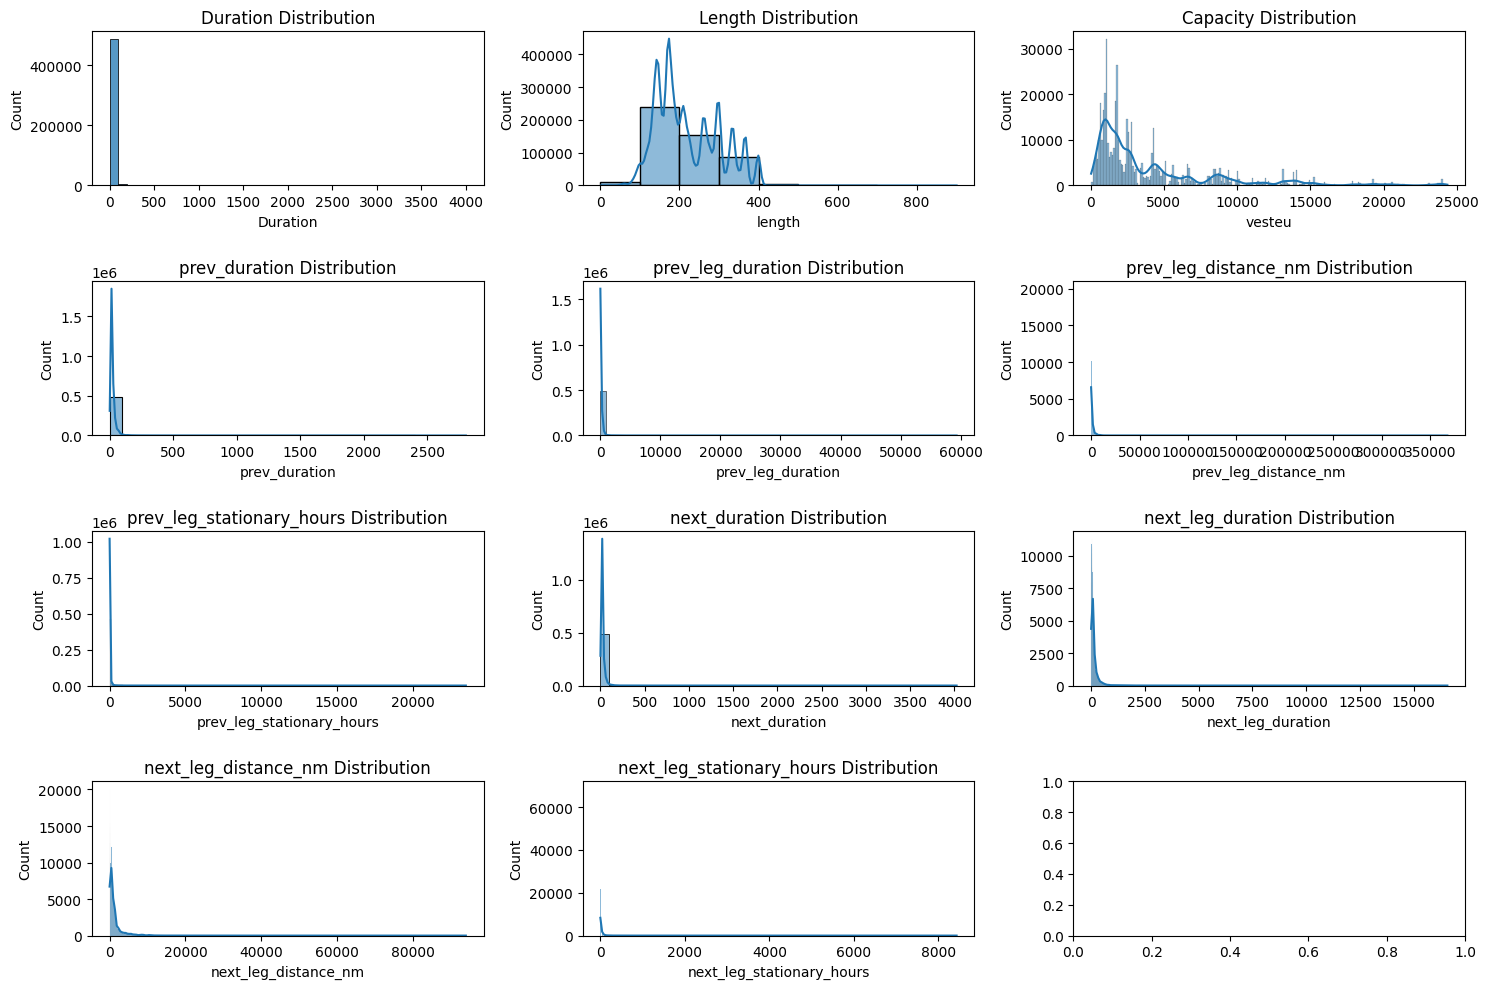

In [93]:
# Create a 4x3 subplot grid for histograms
fig, axs = plt.subplots(4, 3, figsize=(15, 10))

# Flatten the axs array for easier iteration
axs = axs.flatten()

# Plot each histogram in a separate subplot
sns.histplot(data = vessel_data_cleaned_v1, bins = range(0, 4001, 100), x='Duration', ax=axs[0])
axs[0].set_title('Duration Distribution')

sns.histplot(data = vessel_data_cleaned_v1, bins = range(0, 800, 100), kde=True, x='length', ax=axs[1])
axs[1].set_title('Length Distribution')

sns.histplot(data = vessel_data_cleaned_v1, kde=True, x='vesteu', ax=axs[2])
axs[2].set_title('Capacity Distribution')

sns.histplot(data = vessel_data_cleaned_v1, bins = range(0, 2500, 100), kde=True, x='prev_duration', ax=axs[3])
axs[3].set_title('prev_duration Distribution')

sns.histplot(data = vessel_data_cleaned_v1, bins = range(0, 60000, 1000), kde=True, x='prev_leg_duration', ax=axs[4])
axs[4].set_title('prev_leg_duration Distribution')

sns.histplot(data = vessel_data_cleaned_v1, kde=True, x='prev_leg_distance_nm', ax=axs[5])
axs[5].set_title('prev_leg_distance_nm Distribution')

sns.histplot(data = vessel_data_cleaned_v1, bins = range(0, 20000, 100), kde=True, x='prev_leg_stationary_hours', ax=axs[6])
axs[6].set_title('prev_leg_stationary_hours Distribution')

sns.histplot(data = vessel_data_cleaned_v1, bins = range(0, 4000, 100), kde=True, x='next_duration', ax=axs[7])
axs[7].set_title('next_duration Distribution')

sns.histplot(data = vessel_data_cleaned_v1, kde=True, x='next_leg_duration', ax=axs[8])
axs[8].set_title('next_leg_duration Distribution')

sns.histplot(data = vessel_data_cleaned_v1, kde=True, x='next_leg_distance_nm', ax=axs[9])
axs[9].set_title('next_leg_distance_nm Distribution')

sns.histplot(data = vessel_data_cleaned_v1, kde=True, x='next_leg_stationary_hours', ax=axs[10])
axs[10].set_title('next_leg_stationary_hours Distribution')

# Adjust layout
plt.tight_layout()
plt.show()

Key insights -
- Features seems to be positively skewed, that means the tail is extends towards the right side and majority of data points are concentrated.
- By seeing the vessel lenght data, it seems most of the vessel are short or mid range vessel and very few of them have a very high lenth.
- Vessel capacity is in direct co relation with the vessel length, Most of the vessel capcity is falling under low and mid range.
- Duration, previous and next duration features showcase most of the shipment are bound in certain time ranges and very small percentage of shipement takes high amount of time.
- Fetaure related to stationay hours, It seems most of the consignment, the waiting time at the Port to unload is less and pridictable.


## Categorical Features

In [95]:
categorical_columns = vessel_data_cleaned_v1.select_dtypes(include=['object']).columns
print("Categorical columns:")
print(categorical_columns)

Categorical columns:
Index(['call_id', 'imo', 'vessel_name_ais', 'vessel_type_ais', 'Country',
       'CountryCode', 'Port', 'Terminal', 'Service_name', 'prev_port',
       'prev_call_id', 'next_port', 'next_call_id'],
      dtype='object')


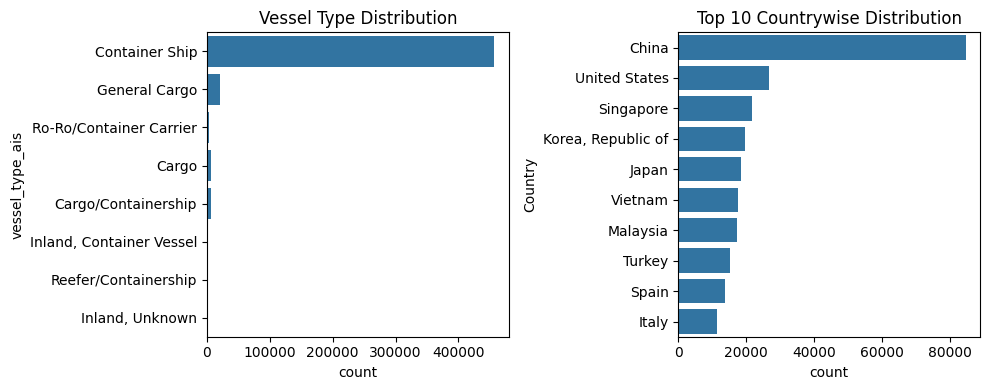

In [104]:
# Create a 1x2 subplot grid
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plot the Vessel Type Distribution on the first subplot
sns.countplot(data=vessel_data_cleaned_v1, y='vessel_type_ais', ax=axs[0])
axs[0].set_title('Vessel Type Distribution')

# Calculate the top 10 countries by count
top_countries = vessel_data_cleaned_v1['Country'].value_counts().head(10).index
# Filter the data for the top 10 countries
top_countries_data = vessel_data_cleaned_v1[vessel_data_cleaned_v1['Country'].isin(top_countries)]

# Plot the Top 10 Countrywise Distribution on the second subplot
sns.countplot(data=top_countries_data, y='Country', order=top_countries, ax=axs[1])
axs[1].set_title('Top 10 Countrywise Distribution')

# Adjust layout
plt.tight_layout()
plt.show()


Observations -
- Container ships seems to be dominate the Vessel type segment and are preferred mode of transport.
- China and US being the bigest exporter to the world. Maximum vessel are from these 2 countries

## Feature Engineering

In [105]:
vessel_data_cleaned_v1.columns

Index(['call_id', 'arrival_date', 'departure_date', 'arrival_time',
       'departure_time', 'imo', 'vessel_name_ais', 'vessel_type_ais',
       'Country', 'CountryCode', 'Port', 'Terminal', 'Duration',
       'Service_name', 'length', 'prev_departure_time', 'vesteu', 'prev_port',
       'prev_arrival_time', 'prev_duration', 'prev_leg_duration',
       'prev_leg_distance_nm', 'prev_leg_stationary_hours', 'prev_call_id',
       'next_port', 'next_arrival_time', 'next_duration', 'next_leg_duration',
       'next_leg_distance_nm', 'next_leg_stationary_hours', 'next_call_id'],
      dtype='object')

In [106]:
rel_cols = ['arrival_date', 'departure_date', 'arrival_time','departure_time', 'vessel_type_ais', 'Country', 'CountryCode',
            'Duration','Service_name', 'length', 'prev_departure_time', 'vesteu', 'prev_port','prev_arrival_time', 'prev_duration', 'prev_leg_duration',
            'prev_leg_distance_nm', 'prev_leg_stationary_hours','next_port', 'next_arrival_time', 'next_duration', 'next_leg_duration',
            'next_leg_distance_nm', 'next_leg_stationary_hours']

vessel_data_rel_cols = vessel_data_cleaned_v1[rel_cols]
vessel_data_rel_cols.columns

Index(['arrival_date', 'departure_date', 'arrival_time', 'departure_time',
       'vessel_type_ais', 'Country', 'CountryCode', 'Duration', 'Service_name',
       'length', 'prev_departure_time', 'vesteu', 'prev_port',
       'prev_arrival_time', 'prev_duration', 'prev_leg_duration',
       'prev_leg_distance_nm', 'prev_leg_stationary_hours', 'next_port',
       'next_arrival_time', 'next_duration', 'next_leg_duration',
       'next_leg_distance_nm', 'next_leg_stationary_hours'],
      dtype='object')

In [114]:
## Creating a feature by adding the duration of previous, current and next port to calculate total time take by the shipment.
duration_features = ['prev_duration', 'prev_leg_duration', 'prev_leg_stationary_hours', 'Duration', 'next_duration', 'next_leg_duration',
                     'next_leg_stationary_hours']
vessel_data_cleaned_v1['total_duration_shipment'] = vessel_data_cleaned_v1[duration_features].sum(axis=1)
vessel_data_cleaned_v1['total_duration_shipment_days'] = vessel_data_cleaned_v1['total_duration_shipment'] / 24

## Creating a feature by adding the distance of previous, current and next port to calculate total distance taken by the shipment.
distance_features = ['prev_leg_distance_nm', 'next_leg_distance_nm']
vessel_data_cleaned_v1['total_distance_shipment'] = vessel_data_cleaned_v1[distance_features].sum(axis=1)

<ipython-input-114-5133506aae48>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vessel_data_cleaned_v1['total_duration_shipment'] = vessel_data_cleaned_v1[duration_features].sum(axis=1)
<ipython-input-114-5133506aae48>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vessel_data_cleaned_v1['total_duration_shipment_days'] = vessel_data_cleaned_v1['total_duration_shipment'] / 24
<ipython-input-114-5133506aae48>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

In [115]:
vessel_data_cleaned_v1[['total_duration_shipment', 'total_duration_shipment_days', 'total_distance_shipment']].describe()

,total_duration_shipment,total_duration_shipment_days,total_distance_shipment
count,494468.000000,494468.000000,494468.000000
mean,418.812489,17.450520,2598.301685
std,665.491362,27.728807,3310.228043
min,15.000833,0.625035,0.017461
25%,186.676597,7.778192,891.448820
50%,280.864306,11.702679,1591.036549
75%,459.996944,19.166539,3026.830456
max,66166.200833,2756.925035,375156.234814


Observations -
- 2756 no of days seems incorrect. As this would equal to 7 years. I beleive anything beyond 6 minths to 1 year is too high.

In [116]:
## Dataset records before cleaning
print('Record Count Before Cleaning', vessel_data_cleaned_v1.shape)

def data_cleanup(df):

  return df[(df.total_duration_shipment_days <= 365)]

vessel_data_cleaned_v3 = data_cleanup(vessel_data_cleaned_v1)

print('Record Count After Cleaning', vessel_data_cleaned_v3.shape)

Record Count Before Cleaning (494468, 34)
Record Count After Cleaning (494042, 34)


## Bivariate Analysis

## Summary